## Modules Import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot') # style sheet
pd.set_option('display.max_columns', None)
%matplotlib inline

camp_data = pd.read_csv(r'C:\Users\lyng1\OneDrive\Desktop\datasets\kaggle\ifood_df.csv')

In [ ]:
camp_data.head()

In [ ]:
camp_data.info()

In [ ]:
camp_data.isnull().sum()

In [ ]:
camp_data.columns

### Features Exploration

* Z_Revenue; revenue after client accepts campaign (all $11)
* ZCostContact; revenue after client accepts campaign (all $3)
* Recency; Number of days since the last purchase

In [7]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmpOverall', 'Response']
products = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','MntTotal', 'MntRegularProds']
customer = ['Income', 'Kidhome','Teenhome','Recency','Complain', 'Age', 'Customer_Days', 'marital_Divorced', 
            'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow','education_2n Cycle', 'education_Basic', 
            'education_Graduation','education_Master', 'education_PhD']

In [ ]:
print("Unique values for Cost to Contact:", camp_data['Z_CostContact'].nunique())
print("Unique values for Revenue:", camp_data['Z_Revenue'].nunique())

In [9]:
# Exclude from data
camp_data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [ ]:
corr = camp_data[(products + campaigns[:-1])].corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) # create mask for lower triangle
plt.figure(figsize=(30, 10))

sns.heatmap(corr, mask=mask, cmap='coolwarm', square=True,linewidths=0.5)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)
plt.title("Products and Campaigns")
plt.show()

In [ ]:
corr = camp_data[(customer + campaigns[:-1])].corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) # create mask for lower triangle
plt.figure(figsize=(30, 10))

sns.heatmap(corr, mask=mask, cmap='coolwarm', square=True,linewidths=0.5)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)
plt.title("Customer Demographics and Campaigns")
plt.show()

In [ ]:
corr = camp_data[(customer + products)].corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) # create mask for lower triangle
plt.figure(figsize=(30, 10))

sns.heatmap(corr, mask=mask, cmap='coolwarm', square=True,linewidths=0.5)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)
plt.title("Customer Demographics and Products")
plt.show()

## Campaigns Success

In [13]:
# # campaign 1 offer comparison(acceptance/refusal)
# for col in products + customer:
#     plt.figure(figsize=(5, 3))
#     plt.hist(camp_data[camp_data['AcceptedCmp1']==1][col], color='Blue',label='accepted', alpha=0.7, density=True)
#     plt.hist(camp_data[camp_data['AcceptedCmp1']==0][col], color='Red', label='refused', alpha=0.7, density=True)    
#     plt.legend()
#     plt.title(col)
#     plt.xlabel(col)
#     plt.ylabel('probability')
#     plt.show()

In [ ]:
camp_name = {"AcceptedCmp1":"Campaign 1", "AcceptedCmp2":"Campaign 2",
             "AcceptedCmp3":"Campaign 3", "AcceptedCmp4":"Campaign 4",
             "AcceptedCmp5":"Campaign 5"}
# Extracting and Renaming data
plt.figure(figsize=(7,4))
camp_data[campaigns[:-2]].sum().rename(index=camp_name).plot.bar(legend=False)

# Plotting Data
plt.title("Acceptance by Campaigns")
plt.xticks(rotation=0)
plt.ylabel("Accepted")
plt.xlabel(None)
plt.show()

In [ ]:
# create dictionary for profit by campaigns
profit_by_camp = {}
for camp in campaigns[:-2]:
    profit_by_camp[camp] = camp_data[camp_data[camp] == 1]['MntTotal'].sum()
    
# Convert from dictionary to df
mnt_total_df = pd.Series(profit_by_camp).to_frame().rename(index=camp_name)

# Plotting data
plt.figure(figsize=(7, 4))
mnt_total_df.plot.bar(legend=False)
plt.title('Profit by Campaign')
plt.xlabel(None)
plt.xticks(rotation=0)
plt.show()

In [ ]:
product_name = {'MntGoldProds':"Gold", "MntSweetProducts":"Sweets",
                "MntFishProducts":"Fish", "MntMeatProducts":"Meat",
                "MntFruits":"Fruits","MntWines":"Wine"}
camp_data[camp_data[campaigns[-2]]==1][products[:6]]\
                .rename(columns=product_name).sum().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=0)
plt.title("All Profit by Products")

In [ ]:
#Profit by Purchase Method in all campaign
method_names = {'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog', 'NumStorePurchases':'Store'}
method_df = camp_data[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases'] + campaigns[:-1]].rename(columns=method_names)

method_df[method_df['AcceptedCmpOverall'] > 0][['Web','Catalog','Store']].sum().plot.bar()
plt.xticks(rotation=1)
plt.title("All Purchase Method's Profit")

In [18]:
# Purchase Method Profits for each campaign
# for camp in campaigns[:-2]:
#     method_df[method_df[camp] > 0][['Web','Catalog','Store']].sum().plot.bar()
#     plt.xticks(rotation=1)
#     plt.title("Method Profit (" + camp_name[camp]+")")
#     plt.show()

Delve into specific campaigns
* Research on why campaign 2 in particular has both low profit and acceptance rate
    * --> Check why others are popular

In [19]:
# campaign 1 offer comparison(acceptance/refusal)
# for col in products + customer:
#     plt.figure(figsize=(5, 3))
#     plt.hist(camp_data[camp_data['AcceptedCmp1']==1][col], color='Blue',label='accepted', alpha=0.7, density=True)
#     plt.hist(camp_data[camp_data['AcceptedCmp1']==0][col], color='Red', label='refused', alpha=0.7, density=True)    
#     plt.legend()
#     plt.title(col)
#     plt.xlabel(col)
#     plt.ylabel('probability')
#     plt.show()

## Customer Demographic

### RFM Cluster Analysis

In [ ]:
# Preprocess RFM table
camp_data['Frequency'] = camp_data['NumCatalogPurchases'] + camp_data['NumStorePurchases'] + camp_data['NumWebPurchases']

rfm_names = ['Recency', 'Frequency', 'MntTotal']
rfm_rename = {'MntTotal':'Monetary'}

rfm_df = camp_data[rfm_names].copy().rename(columns=rfm_rename)
rfm_df

In [21]:
# Scale data and gather additional info for k-scores
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled = scaler.fit_transform(rfm_df)


# Finding the optimal number of clusters
inertia = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled, kmeans.labels_))

In [ ]:
# graphing optimal k scores
plt.figure(figsize=(7,4))
plt.plot(k_range,inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.show()

plt.figure(figsize=(7,4))
plt.plot(k_range,silhouette_scores, marker='o')
plt.title("Silhoutte Score")
plt.xlabel("Number of Clusters (k)")
plt.show()

In [23]:
# Using k-means to create cluster labels
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(scaled)

In [ ]:
# scored rfm for each customer
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
def RScore(x, p, d):
    if p == "Recency":
        if x <= d[p][0.25]:
            return 4
        elif x <= d[p][0.5]:
            return 3
        elif x <= d[p][0.75]:
            return 2
        else:
            return 1
    else:        
        if x <= d[p][0.25]:
            return 1
        elif x <= d[p][0.5]:
            return 2
        elif x <= d[p][0.75]:
            return 3
        else:
            return 4
rfm_df['R'] = rfm_df['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(RScore, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(RScore, args=('Monetary',quantiles,))

rfm_df['RFM_Score'] = rfm_df[['R','F','M']].sum(axis=1)

rfm_df.head()

In [ ]:
# Label customer scores
customer_value_labels = ['Low-Value','Mid-Value','High-Value']
def assign_segments(score):
    if score < 5:
        return 'Low-Value'
    elif score < 9:
        return 'Mid-Value'
    else:
        return 'High-Value'
rfm_df['customer_value'] = rfm_df['RFM_Score'].apply(assign_segments)
rfm_df.head()

In [ ]:
# Reorder categories; change customer_value to categorical object for to imply ranking
rfm_df['customer_value'] = pd.Categorical(rfm_df['customer_value'], categories=customer_value_labels, ordered=True)

# Plot data
plt.figure(figsize=(5,4))
rfm_df['customer_value'].value_counts().sort_index().plot.bar()

plt.xticks(rotation=0)
plt.xlabel(None)
plt.title("Current Customer Values")
plt.show()

#### Explore Valued Customer Groups

In [93]:
rated_data = pd.merge(camp_data[customer+campaigns[:-1]], rfm_df[['RFM_Score','customer_value']], left_index=True, right_index=True)

In [94]:
high_valued_income = round(rated_data[rated_data["customer_value"]=='High-Value']['Income'].mean())
high_valued_age = round(rated_data[rated_data["customer_value"]=='High-Value']['Age'].mean())

print("Highly valued customers' income:", high_valued_income,
      "\nHighly valued customers' age:", high_valued_age)

Highly valued customers' income: 69211 
Highly valued customers' age: 53


In [95]:
low_valued_income = round(rated_data[rated_data["customer_value"]=='Low-Value']['Income'].mean())
low_valued_age = round(rated_data[rated_data["customer_value"]=='Low-Value']['Age'].mean())

print("Lower valued customers' income:", low_valued_income,
      "\nLower valued customers' age:", low_valued_age)

Lower valued customers' income: 30817 
Lower valued customers' age: 48


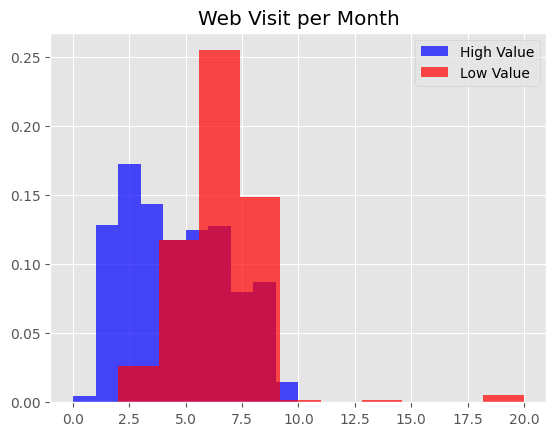

In [96]:
# compare high vs low valued web visit
plt.hist(camp_data[rated_data["customer_value"]=='High-Value']['NumWebVisitsMonth'], color = 'Blue', label='High Value', alpha=0.7, density=True)
plt.hist(camp_data[rated_data["customer_value"]=='Low-Value']['NumWebVisitsMonth'], color = 'Red', label='Low Value', alpha=0.7, density=True)

plt.title('Web Visit per Month')
plt.legend()
plt.show()


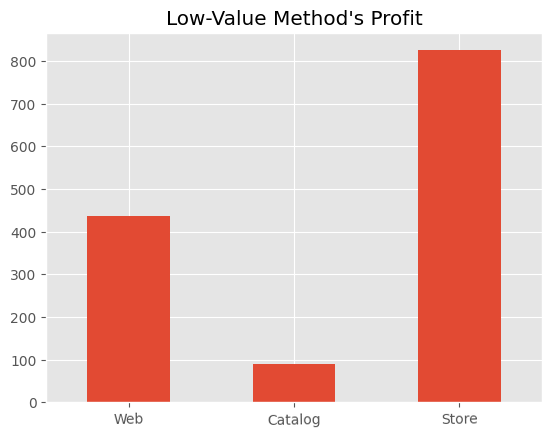

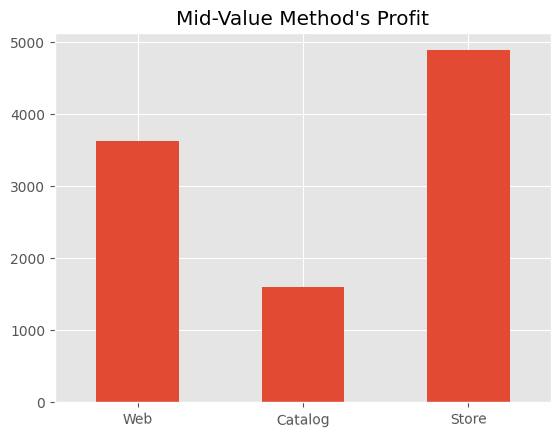

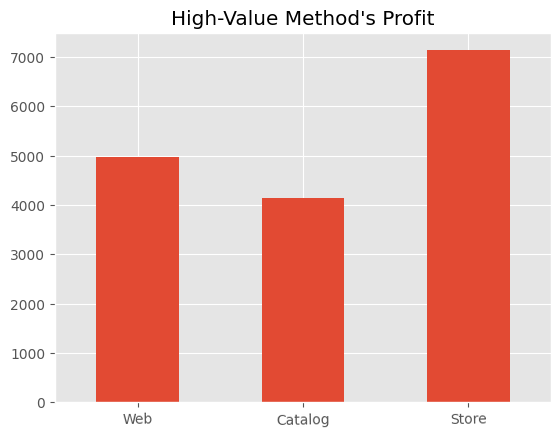

In [97]:
# Popular purchase methods across customer values
for col in customer_value_labels:
    camp_data[rated_data['customer_value']== col].rename(columns=method_names)[['Web','Catalog','Store']].sum().plot.bar()
    plt.xticks(rotation=1)
    plt.title(f"{col} Method's Profit")
    plt.show()

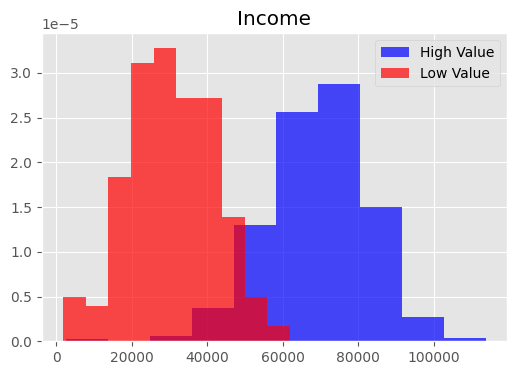

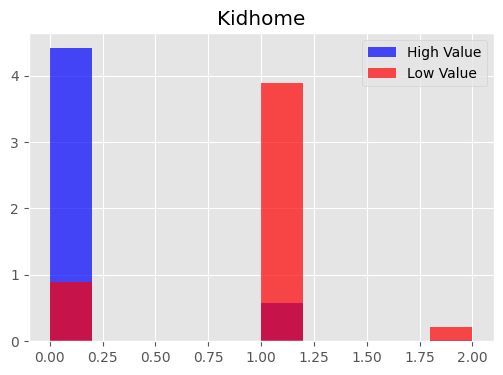

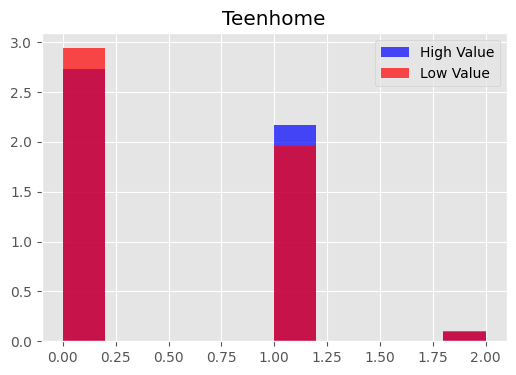

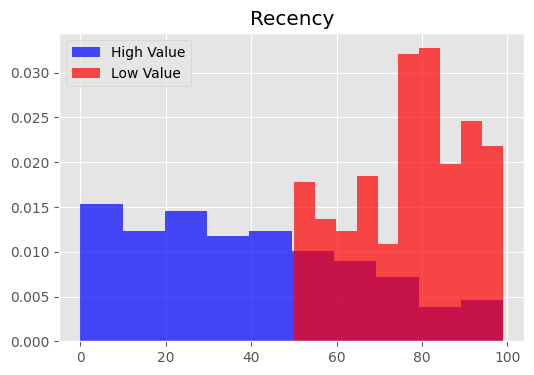

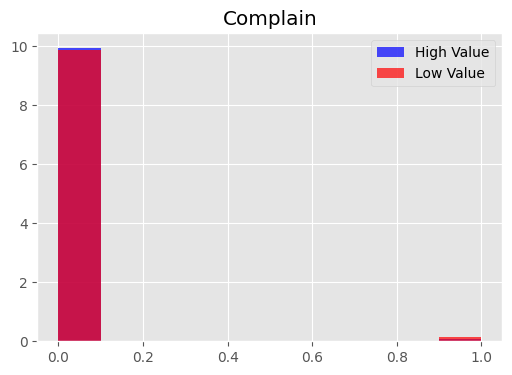

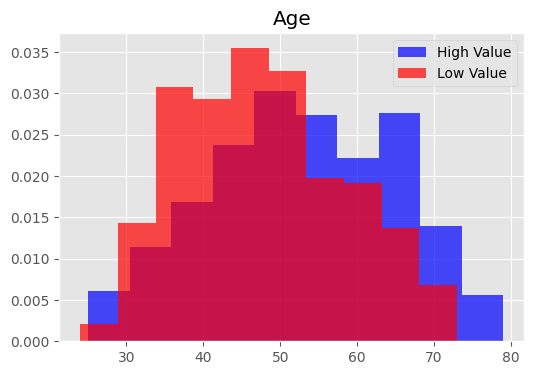

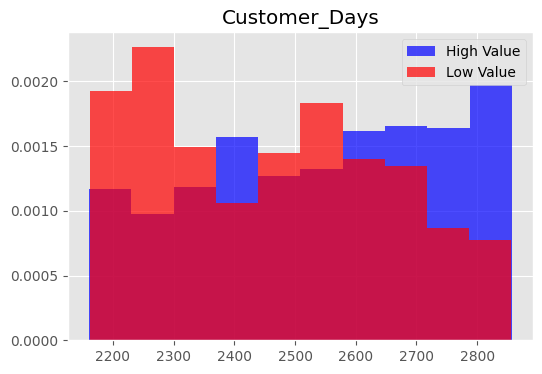

In [98]:
# compare high vs low valued customer demographic
for col in customer[:-10]:
    plt.figure(figsize=(6,4))
    plt.hist(rated_data[rated_data["customer_value"]=='High-Value'][col], color = 'Blue', label='High Value', alpha=0.7, density=True)
    # plt.hist(rated_data[rated_data['customer_value']=='Mid-Value'][col], color='Green', label='Mid Value', alpha=0.7, density=True) 
    plt.hist(rated_data[rated_data['customer_value']=='Low-Value'][col], color='Red', label='Low Value', alpha=0.7, density=True)    
    plt.title(col)
    plt.legend()
    plt.show()


In [99]:
# preprocess data for high/low/mid value for marriage
marital_status = [column for column in customer if column.startswith('marital')]
new_m_status = [status[8:]for status in marital_status] # new names for marriage columns

rated_marital = rated_data[marital_status+['customer_value']].copy()
rated_marital['marital_status'] = rated_marital[marital_status].idxmax(axis=1)

# Create new table
rated_graph_marital = pd.crosstab(rated_marital['marital_status'], rated_marital['customer_value'])
rated_graph_marital.rename(index=dict(zip(marital_status,new_m_status)),inplace=True)
rated_graph_marital


customer_value,Low-Value,Mid-Value,High-Value
marital_status,,,
Divorced,34,106,90
Married,102,441,311
Single,75,219,183
Together,82,282,204
Widow,6,33,37


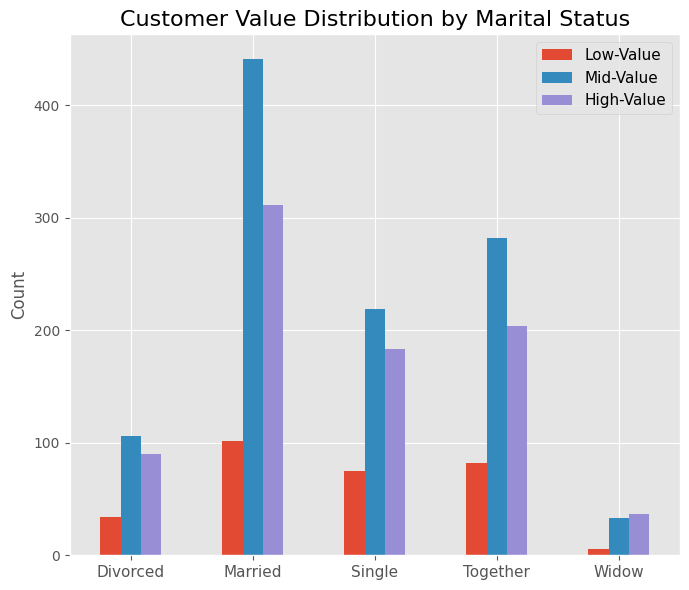

In [100]:
# Plot the grouped bar chart
rated_graph_marital.plot(kind='bar', figsize=(7, 6))

# Add labels and title
plt.title('Customer Value Distribution by Marital Status', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel(None)
plt.xticks(rotation=0, fontsize=11)
plt.legend(fontsize=11)

# Display the chart
plt.tight_layout()
plt.show()

In [101]:
# preprocess data for graph h/l/m for educations
# Explicit column names to specify bar ordering
edu_status = ['education_Basic','education_Graduation','education_2n Cycle','education_Master','education_PhD'] 
new_edu_status = [status[10:] for status in edu_status]


rated_edu = rated_data[edu_status+['customer_value']].copy()
rated_edu['education'] = rated_edu[edu_status].idxmax(axis=1)
rated_edu

# Create new table
rated_graph_edu = pd.crosstab(rated_edu['education'], rated_edu['customer_value'])
rated_graph_edu.rename(index=dict(zip(edu_status,new_edu_status)),inplace=True)
rated_graph_edu


customer_value,Low-Value,Mid-Value,High-Value
education,,,
2n Cycle,37,92,69
Basic,20,34,0
Graduation,155,537,421
Master,41,197,126
PhD,46,221,209


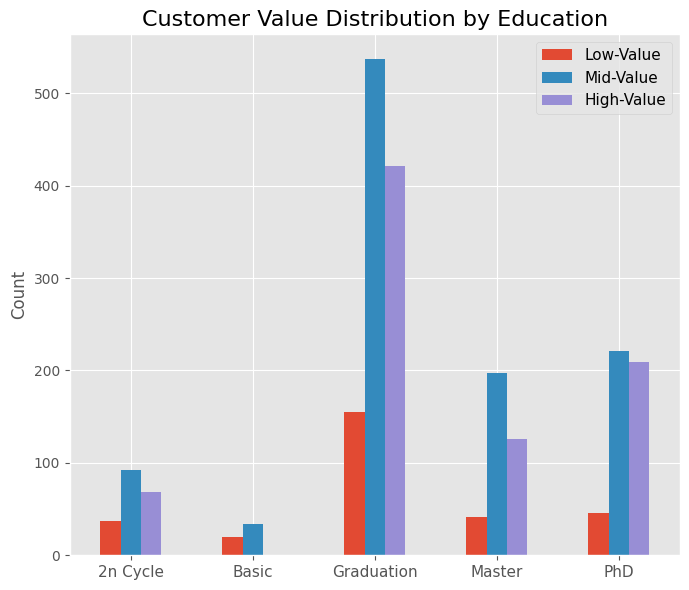

In [102]:
# Plot the education data
rated_graph_edu.plot(kind='bar', figsize=(7, 6))

# Add labels and title
plt.title('Customer Value Distribution by Education', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel(None)
plt.xticks(rotation=0, fontsize=11)
plt.legend(fontsize=11)

# Display the chart
plt.tight_layout()
plt.show()

In [103]:
# preprocess data for h/l/m values for campaigns
rated_camp = rated_data[campaigns[:-2]+['customer_value']].copy()
rated_camp

# Melt data to long format
melted_campaigns = rated_camp.melt(id_vars='customer_value', value_vars=campaigns[:-2], var_name='Campaign', value_name='Accepted')
melted_campaigns

grouped_campaigns = melted_campaigns[melted_campaigns['Accepted'] == 1].groupby(['Campaign', 'customer_value'], observed=False).size().unstack(fill_value=0)
grouped_campaigns.rename(index=camp_name,inplace=True)
grouped_campaigns

customer_value,Low-Value,Mid-Value,High-Value
Campaign,,,
Campaign 1,0,26,116
Campaign 2,0,6,24
Campaign 3,17,74,72
Campaign 4,1,54,109
Campaign 5,0,26,135


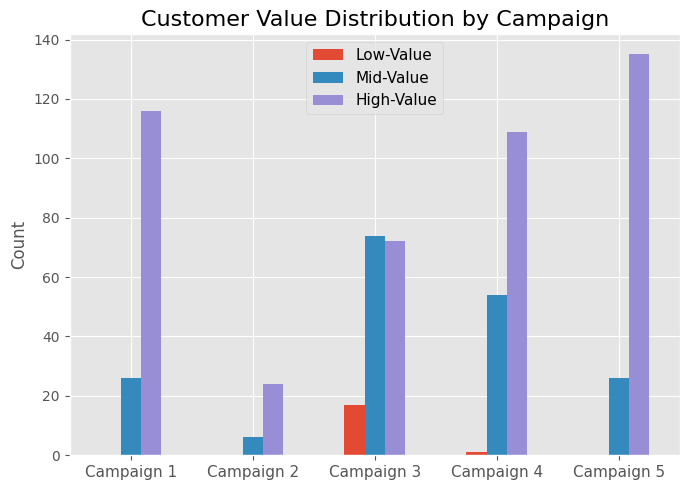

In [104]:
#Plot campaign data for h/l/m valued customers
grouped_campaigns.plot(kind='bar', figsize=(7, 5))

plt.title('Customer Value Distribution by Campaign', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel(None)
plt.xticks(rotation=0, fontsize=11)
plt.legend(fontsize=11)
plt.tight_layout()

### Brand's general demographic

Education Features are based on Brazil's education system; as iFood is a company in Brazil
* Basic - Upper Secondary Schooling, High School
* Graduation - Bachelor
* 2n Cycle - Diploma
* Master
* PhD


--------
*Notes:*
* Brand popular w/ Bachelor degree holders
* Brand's demographic in married customers, followed by "together" and "single"
    * Not much to note in 0 kids vs 1+ kids

In [39]:
# Customer demographic heatmap
# corr = camp_data[customer].corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))
# plt.figure(figsize=(20, 20)) 

# sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
# plt.show()

In [ ]:
print("Median Income:",round(camp_data[['Income']].median().item()),
      "\nMean Income:",round(camp_data[['Income']].mean().item()))

Customer Population's Education

In [ ]:
# Create general customer's bar chart
edu_df = camp_data[edu_status + [campaigns[-2]]]

# Plot data
general_edu = (edu_df.iloc[:,:-1]).sum().to_frame().rename(index=dict(zip(edu_status, new_edu_status)))
general_edu.plot.bar(legend=False)
plt.xticks(rotation=0)
plt.title("Customer's Education Count")
plt.show()

In [ ]:
# General Marital Statuses
# gets columns for customer's marital status
marital_df = camp_data[marital_status + [campaigns[-2]]] # combined needed columns for chart

general_marital = (marital_df.iloc[:,:-1]).sum().to_frame().rename(index=dict(zip(marital_status, new_m_status)))
general_marital.plot.bar(legend=False)
plt.xticks(rotation=0)
plt.title("Customer's Marital Counts")
plt.show()

In [ ]:
# Create graph for children at home
# Simplify #'s of kid/teen columns at home to 0/1+ kids
children_df = camp_data[['Kidhome','Teenhome']].copy()
children_df['Kidhome_group'] = children_df['Kidhome'].apply(lambda x: '0' if x == 0 else '1+')
children_df['Teenhome_group'] = children_df['Teenhome'].apply(lambda x: '0' if x == 0 else '1+')

# gets occurrence count
groups = ['Kids', 'Teens']
kidhome_counts = children_df['Kidhome_group'].value_counts().reindex(['0', '1+'], fill_value=0)
teenhome_counts = children_df['Teenhome_group'].value_counts().reindex(['0', '1+'], fill_value=0)

# plot data
bar_width = 0.2
x = range(len(groups))  # gets position in range (start, stop) exclusive

plt.bar(x, [kidhome_counts['0'], teenhome_counts['0']], width=bar_width, color='grey', alpha=0.6) # plots 0 values in respective position in range
plt.bar([p + bar_width for p in x], [kidhome_counts['1+'], teenhome_counts['1+']], width=bar_width, color='blue', alpha=0.6) # add offset to the positions through range

# Add labels and adjust x-ticks to show Kidhome and Teenhome as groups
plt.ylabel('Count')
plt.title('Children at Home')
plt.xticks([p + bar_width / 2 for p in x], groups)
plt.legend(labels=['No Kids', '1+ Kid'])
plt.tight_layout()
plt.show()

### Successful Campaign's Demographic

In [ ]:
# create df and get names of desired campaigns
camp_to_compare = ['AcceptedCmp5','AcceptedCmp2','AcceptedCmp1']
marital_comp = camp_data[marital_status + camp_to_compare].copy()

# creates digestible marital_status column
marital_comp['marital_status'] = marital_comp[marital_status].idxmax(axis=1)

campaign_marital = marital_comp.groupby('marital_status')[camp_to_compare].sum().reset_index()
campaign_marital


In [ ]:
# Plotting marital data
x = np.arange(len(marital_status))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots(figsize=(8, 6)) 

# Create bars for each campaign
bars1 = ax.bar(x - width, campaign_marital['AcceptedCmp5'], width, label='AcceptedCmp5')
bars2 = ax.bar(x, campaign_marital['AcceptedCmp2'], width, label='AcceptedCmp2')
bars3 = ax.bar(x + width, campaign_marital['AcceptedCmp1'], width, label='AcceptedCmp1')

# Plot data
ax.set_ylabel('Number of Accepted Campaigns')
ax.set_title('Accepted Campaigns by Marital Status')
ax.set_xticks(x)
ax.set_xticklabels(new_m_status)
ax.legend(labels =['Campaign 5','Campaign 2','Campaign 1'])
plt.show()

In [ ]:
# Demographic between most vs least popular campaign
for col in customer[:-10]:
    plt.figure(figsize=(6,4))
    plt.hist(camp_data[camp_data["AcceptedCmp5"]==1][col], color = 'Blue', label='Campaign 5', alpha=0.7, density=True)
    # plt.hist(camp_data[camp_data["AcceptedCmp1"]==1][col], color = 'Green', label='Campaign 1', alpha=0.7, density=True)
    plt.hist(camp_data[camp_data['AcceptedCmp2']==1][col], color='Red', label='Campaign 2', alpha=0.7, density=True)    
    plt.title(col)
    plt.legend()
    plt.show()


In [ ]:
# Graph for marital status counts for campaigns accepted
new_marital_df = marital_df[marital_df['AcceptedCmpOverall'] > 0][marital_status].sum().rename(index = dict(zip(marital_status, new_m_status)))

# Plotting Data
new_marital_df.plot.bar()
plt.xticks(rotation=0)
plt.title("Acceptance Count by Marital Status")
plt.show()

In [ ]:
# Graph for education counts for campaigns accepted
new_edu_df = edu_df[edu_df['AcceptedCmpOverall'] > 0][edu_status].sum().rename(index = dict(zip(edu_status, new_edu_status)))

# Plotting Data
new_edu_df.plot.bar()
plt.xticks(rotation=0)
plt.title("Acceptance Count by Education")
plt.show()

## Further Exploration

### Products and Deals

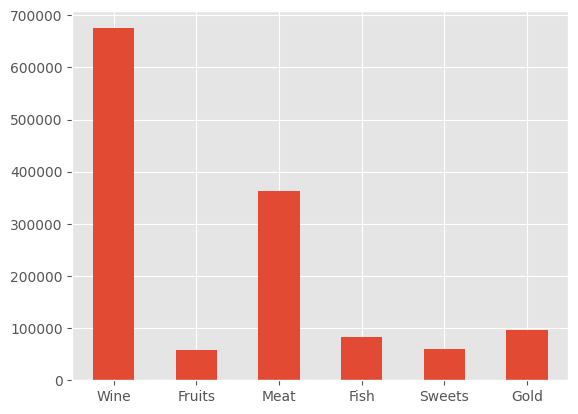

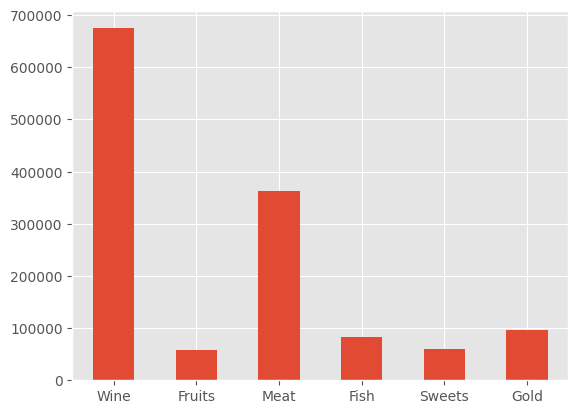

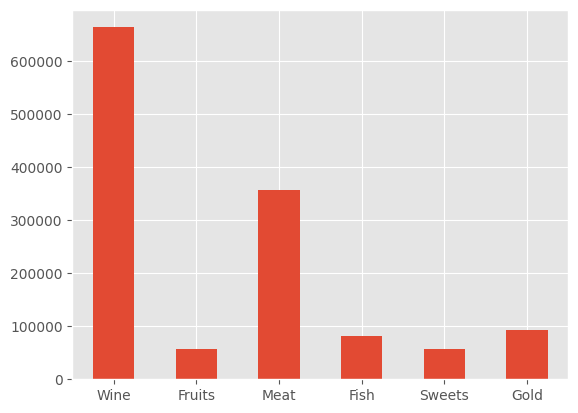

In [106]:
# Product profit across purchase Methods
camp_data[camp_data['NumStorePurchases'] > 0][products[:6]].sum().rename(index=product_name).plot.bar()
plt.xticks(rotation=0)
plt.show()
camp_data[camp_data['NumWebPurchases'] > 0][products[:6]].sum().rename(index=product_name).plot.bar()
plt.xticks(rotation=0)
plt.show()
camp_data[camp_data['NumCatalogPurchases'] > 0][products[:6]].sum().rename(index=product_name).plot.bar()
plt.xticks(rotation=0)
plt.show()

In [108]:
#Deals
# Across different purchase methods, products, what is it like for deals
camp_data['NumDealsPurchases']

0       3
1       2
2       1
3       2
4       5
       ..
2200    2
2201    7
2202    1
2203    2
2204    3
Name: NumDealsPurchases, Length: 2205, dtype: int64

### Complaints
Complain = 1 indicates complaints within past 2 years
* Explore recency, and membership length with complaints, age
* Explore primary audience and our effectiveness, as well as the least effective audience reach


-----
*Notes:*
* 1747 customers who accepted 0 offers
    * Hence, not every campaign will have a complaint
* 20 customer who complained within last 2 years

In [55]:
print("Customers w/ no offers accepted:",camp_data[camp_data['AcceptedCmpOverall'] == 0].shape[0],
      "\nTotal Complaints:", camp_data[camp_data['Complain'] == 1].shape[0])

Customers w/ no offers accepted: 1747 
Total Complaints: 20


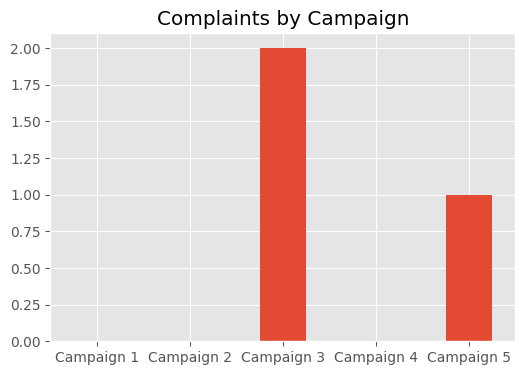

In [56]:
complaints_df = camp_data[camp_data['Complain'] == 1][campaigns[:-2]].sum().rename(index=camp_name)
plt.figure(figsize=(6,4))
complaints_df.plot.bar()
plt.title("Complaints by Campaign")
plt.xticks(rotation=0)
plt.show()

In [57]:
# Comparison between complained and no complaints within last 2 years
# for col in products +customer+[campaigns[-2]]:
#     plt.figure(figsize=(5, 3))
#     plt.hist(camp_data[camp_data['Complain']==1][col], color='Blue',label='Complained', alpha=0.7, density=True)
#     plt.hist(camp_data[camp_data['Complain']==0][col], color='Red', label='None', alpha=0.7, density=True)    
#     plt.legend()
#     plt.title(col)
#     plt.xlabel(col)
#     plt.ylabel('probability')
#     plt.show()